# Airline Passenger Satisfaction Prediction Project

In [1]:
!pip install sklearn-features

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for feature importance calculation
from sklearn.metrics import mutual_info_score

#for preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

#for feature selection
from sklearn.feature_selection import SelectKBest, f_classif
#for handling missing value in the pipeline
from sklearn.impute import SimpleImputer, KNNImputer

#for resampling to balance the data distribution 
from imblearn.over_sampling import SMOTE

#for encoding numerical and categorical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder

#models and metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, make_scorer, confusion_matrix, classification_report, precision_score, recall_score

from sklearn.model_selection import RandomizedSearchCV

import joblib

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.shape

(103904, 25)

The data has 103904 entries and 25 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Data cleaning and preprocessing

In [9]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##### Since the first two columns [Unnamed: 0, id] are not related to the prediction, they will be dropped. 

In [10]:
#specify the train data and test data
df_train = pd.read_csv('train.csv', index_col = "Unnamed: 0")
df_test = pd.read_csv('test.csv', index_col = "Unnamed: 0")

#concat two dataframes to create a combined dataframe
df = pd.concat([df_train, df_test], axis=0)

In [11]:
df.shape

(129880, 24)

In [12]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [13]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

##### "Arrival Delay in Minutes" columns has missing values in it. First I will check the values before filling in.  

In [14]:
df['Arrival Delay in Minutes'].mean()

15.09112883918849

<Axes: xlabel='Arrival Delay in Minutes'>

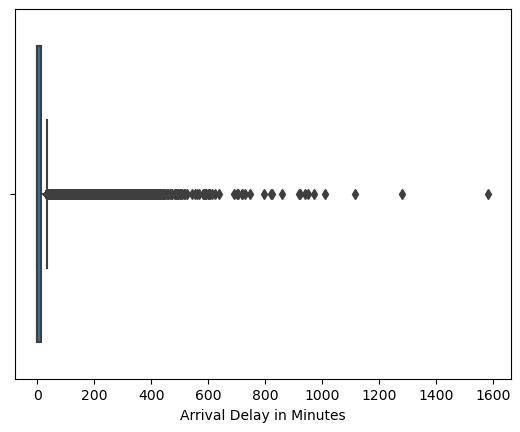

In [15]:
sns.boxplot(x='Arrival Delay in Minutes', data = df)

In [16]:
df['Arrival Delay in Minutes'].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
604.0        1
457.0        1
459.0        1
502.0        1
333.0        1
Name: Arrival Delay in Minutes, Length: 472, dtype: int64

##### Observing the analysis, the mode is 0 by the large margin and the amount of missing value is low compared to the total count of the dataset. Therefore, I will fill 'Arrival Delay in Minutes' the null values with 0.

In [17]:
df.fillna(0, inplace=True)
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

##### Next, I will drop 'id' column because it is irrelevant to the prediction.

In [18]:
df= df.drop(['id'], axis = 1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Exploratory Data Analysis

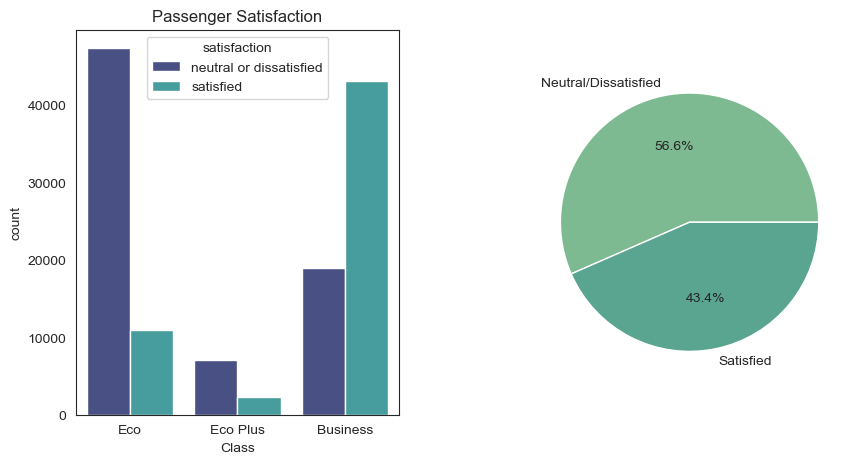

In [19]:
sns.set_style("white")
fig,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x='Class',data = df, hue = 'satisfaction', order=['Eco', 'Eco Plus','Business'], palette='mako', ax = ax[0])
ax[0].set_title('Passenger Satisfaction')
ax[1]=plt.pie(df.satisfaction.value_counts(), labels = ["Neutral/Dissatisfied", "Satisfied"], colors = sns.color_palette("crest"), autopct = '%1.1f%%')

plt.subplots_adjust(hspace = 0.6, wspace=0.4)

pass

[Text(0.5, 1.0, 'Flight Distance by Class')]

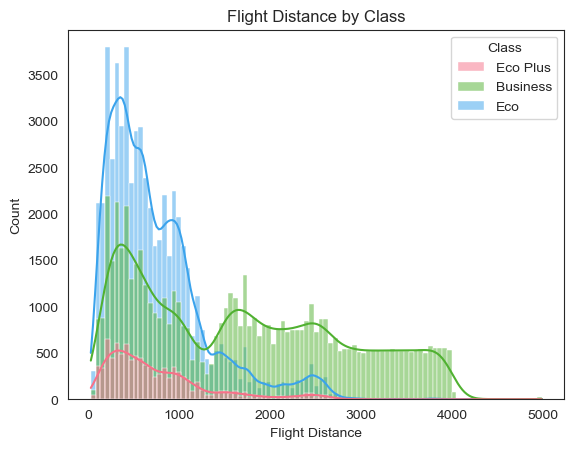

In [20]:
sns.histplot(x='Flight Distance',data=df,hue='Class',kde=True,palette='husl').set(title='Flight Distance by Class')

##### We can see that as the flight distance increases, the customers tend to choose business class for thier travels. Moreover, for flight distance around 1000 miles, economy class is the ideal choice. Although eco plus spans from short to semi-short distance travels, it is still the least popular choice for the airway customers.

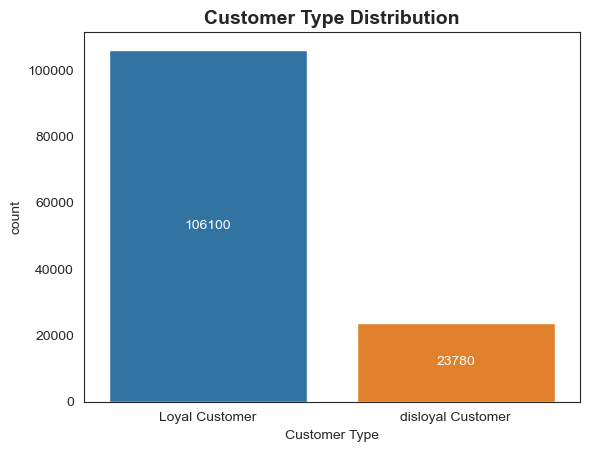

In [21]:
bar = sns.countplot(data=df, x='Customer Type')
for container in bar.containers:
    bar.bar_label(container, label_type="center", color="white")
bar.set_title("Customer Type Distribution", fontsize=14, fontweight="bold")
plt.show()

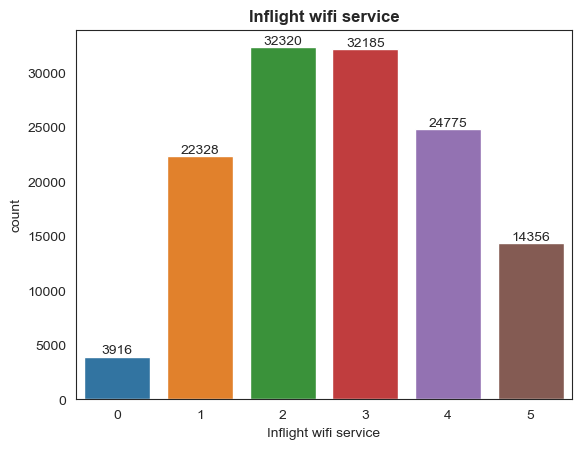

In [22]:
bar = sns.countplot(data=df, x="Inflight wifi service")
for i in bar.containers:
    bar.bar_label(i)
plt.title("Inflight wifi service", weight="bold")
plt.show()

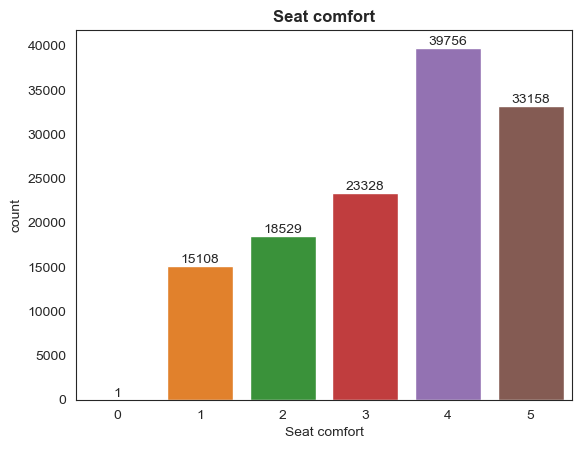

In [23]:
bar = sns.countplot(data=df, x="Seat comfort")
for i in bar.containers:
    bar.bar_label(i)
plt.title("Seat comfort", weight="bold")
plt.show()

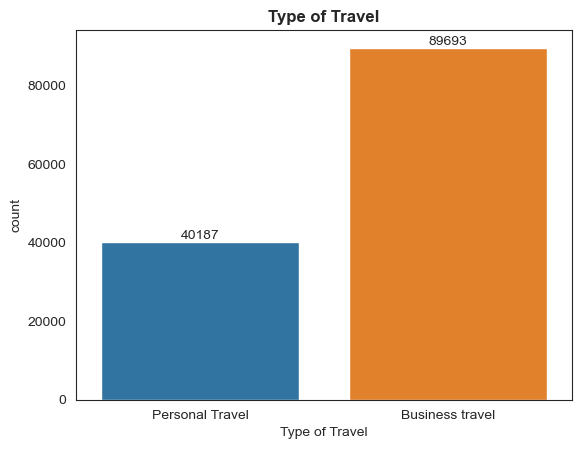

In [24]:
bar = sns.countplot(data=df, x="Type of Travel")
for i in bar.containers:
    bar.bar_label(i)
plt.title("Type of Travel", weight="bold")
plt.show()

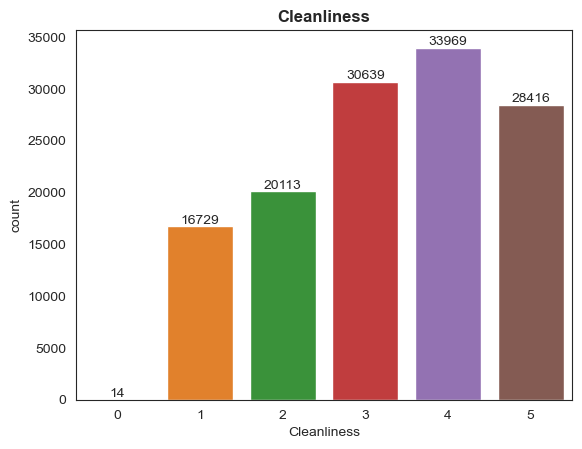

In [25]:
bar = sns.countplot(data=df, x="Cleanliness")
for i in bar.containers:
    bar.bar_label(i)
plt.title("Cleanliness", weight="bold")
plt.show()

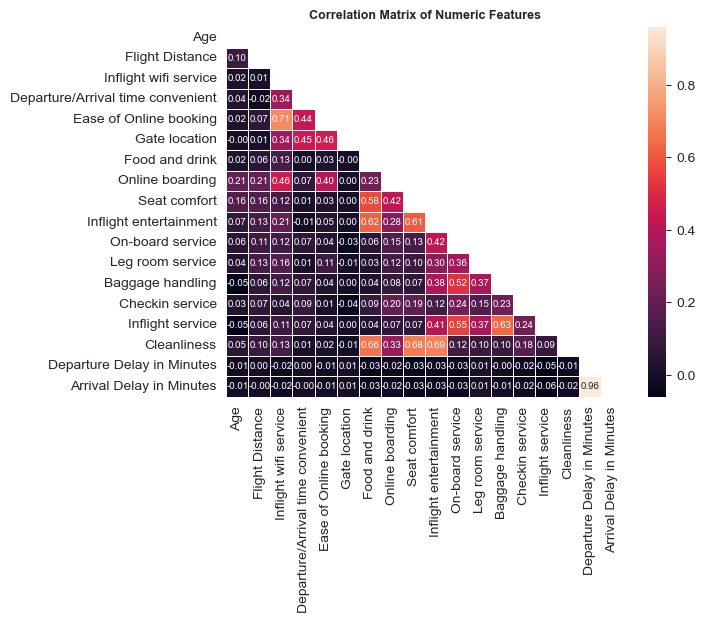

In [26]:
correlation_matrix = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(df.corr(numeric_only=True)))


sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f",
            annot_kws={'size': 7}, linewidths=0.5, cbar=True)
plt.title("Correlation Matrix of Numeric Features", fontsize=9, weight="bold")
plt.show()

### Feature Importance

In [27]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

I will separate categorical and numerical features.

In [28]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [30]:
def mutual_info_satisfation_scores(series):
    return mutual_info_score(series, df.satisfaction)

In [31]:
df[categorical].apply(mutual_info_satisfation_scores)

Gender            0.000063
Customer Type     0.018243
Type of Travel    0.114099
Class             0.132730
dtype: float64

##### 'Class' and 'Type of Travel' are two most important features for passenger satisfaction.

##### Encode Categorical data

In [32]:
df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied":0,
                                             "satisfied":1})

In [33]:
df_copy = df.copy()

In [34]:
OL = OrdinalEncoder()
feature_encoded = OL.fit_transform(df_copy[['Gender', 'Customer Type', 'Type of Travel', 'Class']])

#create dataframe from one-hot encoded features and name them
df_encoded = pd.DataFrame(feature_encoded, columns=OL.get_feature_names_out(['Gender', 'Customer Type', 'Type of Travel', 'Class']))

df_copy.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

#drop the original columns
df_copy.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], inplace=True, axis=1)
df_selection = pd.concat([df_copy, df_encoded], axis=1)

In [35]:
df_selection.sample(10)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender,Customer Type,Type of Travel,Class
105791,57,2054,1,4,3,3,1,4,3,2,...,4,2,2,0,0.0,0,0.0,0.0,0.0,0.0
66596,24,2577,4,4,4,4,5,5,5,5,...,5,3,5,0,0.0,1,1.0,0.0,0.0,0.0
111082,23,968,4,0,5,3,2,5,2,2,...,4,4,2,26,29.0,1,0.0,1.0,0.0,0.0
91786,48,733,4,4,4,1,2,4,5,2,...,3,2,2,0,0.0,0,1.0,0.0,1.0,1.0
120842,22,2160,1,1,2,1,5,5,5,5,...,4,4,5,0,47.0,1,0.0,0.0,0.0,0.0
14456,49,1073,3,4,3,3,5,4,4,2,...,5,2,5,53,68.0,0,0.0,0.0,1.0,1.0
43494,39,2972,3,3,3,3,4,5,5,4,...,3,4,4,0,0.0,1,1.0,0.0,0.0,0.0
70624,21,1237,3,1,3,3,1,3,1,1,...,1,3,1,49,31.0,0,0.0,1.0,0.0,0.0
66584,54,1846,1,1,1,1,3,4,4,4,...,3,4,4,9,0.0,1,0.0,0.0,0.0,0.0
111560,18,432,2,4,2,3,2,2,2,2,...,3,3,2,0,0.0,0,1.0,1.0,0.0,1.0


In [36]:
X_train = df_selection.drop("satisfaction", axis=1)
y_train = df["satisfaction"]

##### For feature selection, I will be using SelectKBest with f_classif and select the top 15 features.
What is SelectKBest?<br>
SelectKBest is a type of filter-based feature selection method in machine learning. In filter-based feature selection methods, the feature selection process is done independently of any specific machine learning algorithm. Instead, it relies on statistical measures to score and rank the features.<br><br>
The score function f_classif computes the F-value between each feature and the target variable, which measures the linear dependency between two variables. Features that are highly dependent on the target variable will have high scores.

In [37]:
best_feature = SelectKBest(score_func=f_classif, k=18)
fit_best = best_feature.fit(X_train, y_train)

df_scores = pd.DataFrame(fit_best.scores_)
df_columns = pd.DataFrame(X_train.columns)

features_score = pd.concat([df_columns, df_scores], axis=1)

features_score.columns = ['Feature', 'Score']
features_score.sort_values(by=['Score'], inplace=True, ascending=False)
features_score

,Feature,Score
7,Online boarding,43698.252161
20,Type of Travel,32952.934552
21,Class,32647.730388
9,Inflight entertainment,24479.573892
8,Seat comfort,17993.257439
10,On-board service,15045.355578
11,Leg room service,14048.467148
15,Cleanliness,13517.980514
1,Flight Distance,12665.660936
2,Inflight wifi service,11347.420455


In [38]:
fit_best = best_feature.fit_transform(X_train, y_train)

In [39]:
df_selection = df[list(best_feature.get_feature_names_out())]
df_selection.sample()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Customer Type,Type of Travel,Class
27730,24,679,5,2,5,5,4,5,4,5,2,4,3,5,12.0,Loyal Customer,Business travel,Eco


In [40]:
df_selection.shape

(129880, 18)

In [41]:
df.shape

(129880, 23)

### Split data for training and testing

In [104]:
X = df_selection
y = df["satisfaction"]

X.sample()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Customer Type,Type of Travel,Class
21703,26,377,4,4,3,4,3,3,3,5,4,5,4,3,0.0,disloyal Customer,Business travel,Business


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (97410, 18)
y_train:  (97410,)
X_test:  (32470, 18)
y_test:  (32470,)


In [44]:
df_selection.columns.to_list()

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Ease of Online booking',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes',
 'Customer Type',
 'Type of Travel',
 'Class']

In [45]:
categorical_cols =df_selection.select_dtypes(include="O").columns.to_list()

numerical_cols = ["Flight Distance", "Arrival Delay in Minutes", "Age"]

ready = list(set(df_selection.columns.tolist()) - set(categorical_cols) - set(numerical_cols))

all_columns = numerical_cols + categorical_cols + ready

In [46]:
ready

['Baggage handling',
 'On-board service',
 'Inflight wifi service',
 'Seat comfort',
 'Food and drink',
 'Cleanliness',
 'Inflight entertainment',
 'Online boarding',
 'Checkin service',
 'Ease of Online booking',
 'Inflight service',
 'Leg room service']

##### I will create pipelines for both categorical and numerical data for simplify the data manipulation and setting different parameters. 
It allows you to keep all the definitions and components of your model in one place, which makes it easier to reuse the model or change it in the future.

In [47]:
numerical_pipe = Pipeline(
    steps=[
        ("Selector", DataFrameSelector(numerical_cols)),  ## Select numerical columns
        ("impute", SimpleImputer(strategy="median")),     ## Impute missing values with median
        ("Transformer", FunctionTransformer(np.log1p)), ## using log transform
        ("Scaler", StandardScaler())                     ## Scale the numerical features ## RobustScaler
    ])

categorical_pipe = Pipeline(
    steps=[
        ("Selector", DataFrameSelector(categorical_cols)),        ## Select categorical columns
        ("impute", SimpleImputer(strategy='most_frequent')),     ## Impute missing values with most frequent value
        ("Encoding", OneHotEncoder(drop='first', sparse_output=False))  # One-hot encode categorical features
    ])

ready_pipe = Pipeline(
    steps=[
        ("Selector", DataFrameSelector(ready)),  ## Select columns that are ready for processing
        ("impute", KNNImputer(n_neighbors=5)) ## Impute missing values using K-nearest neighbors
    ])

all_pipeline = FeatureUnion(
    transformer_list=[
        ('numerical', numerical_pipe),
        ('categorical', categorical_pipe),
        ('ready', ready_pipe)
    ])

#transform the train data using the pipeline
X_train_final = all_pipeline.fit_transform(X_train)
#transform the test data using the pipeline
X_test_final = all_pipeline.transform(X_test)

##### I will use SMOTE to balance the class distribution of the training data. <br>
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [48]:
over_sampling = SMOTE()
X_train_resampled, y_train_resampled = over_sampling.fit_resample(X_train_final, y_train)

In [49]:
#We will check the value counts before and after resampling.
print("y_train before resample :")
print(y_train.value_counts())
print("="*20)
print("y_train after resample :")
print(y_train_resampled.value_counts())

y_train before resample :
0    55089
1    42321
Name: satisfaction, dtype: int64
y_train after resample :
0    55089
1    55089
Name: satisfaction, dtype: int64


In [50]:
np.bincount(y_train)

array([55089, 42321])

#####  I will be making separate functions for operation for simplifying purposes. 

In [52]:
def model_performance(model_name, model, X_train_data, X_test_data, y_train_data, y_test_data):
    y_train_predicted = model.predict(X_train_data)
    y_test_predicted = model.predict(X_test_data)
    
    print(f"==> Model name: {model_name}")
    print("==" * 30)
    
    #model evaluation and metrics
    f1_score_training = round(f1_score(y_train_data, y_train_predicted), 3) * 100
    f1_score_testing = round(f1_score(y_test_data, y_test_predicted), 3) * 100
    print(f"F1-score for training data using {model_name} : {f1_score_training} %")
    print(f"F1-score for testing data using {model_name} : {f1_score_testing} %")
    
    acc_score_training = round(accuracy_score(y_train_data, y_train_predicted), 3) * 100
    acc_score_testing = round(accuracy_score(y_test_data, y_test_predicted), 3) * 100
    print(f"Accuracy Score for training data using {model_name} : {acc_score_training} %")
    print(f"Accuracy Score for testing data using {model_name} : {acc_score_testing} %")

I will be applying cross validation on the models as well. For that, I will make a function for cross validation.

In [53]:
f1_scorer = make_scorer(f1_score, average='micro') #custom scorer for the F1 score with micro averaging
##Micro averaging computes the total number of false positives, false negatives, and true positives over all classes, 
##and then calculates the F1 score

def cross_validation(model_name, model, X_valid, y_valid, CV=5, scoring=f1_scorer):
    val_score = cross_validate(estimator=model, X=X_valid, y=y_valid, cv=CV, return_train_score=True, scoring=scoring)
    
    print(f"==> Model name: {model_name}")
    print("==" * 30)
    
    print(f"Train score : {round(val_score['train_score'].mean(), 2)} \nstandard deviation For Train Score : {round(val_score['train_score'].std(), 3)}")
    print("==" * 30)
    print(f"Test score : {round(val_score['test_score'].mean(), 2)} \nstandard deviation For Test Score : {round(val_score['test_score'].std(), 3)}")

In [54]:
def conf_matrix(model, title=""):
    y_predict = model.predict(X_test_final)
    
    confusionMatrix = confusion_matrix(y_test, y_predict)
    
    plt.figure(figsize=(9, 7))  
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cbar=False)
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{title}")
    
    plt.show()

## Logistic Regression

In [55]:
## without solving imbalance in the data 
logistic_reg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
logistic_reg.fit(X_train_final,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [56]:
model_performance(model_name="Logistic Regression",
                  model=logistic_reg,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model name: Logistic Regression
F1-score for training data using Logistic Regression : 85.3 %
F1-score for testing data using Logistic Regression : 85.1 %
Accuracy Score for training data using Logistic Regression : 87.5 %
Accuracy Score for testing data using Logistic Regression : 87.3 %


In [57]:
cross_validation(model_name="Cross Validation on Logistic Regression.",
                 model=logistic_reg,
                 X_valid=X_train_final,
                 y_valid=y_train)

==> Model name: Cross Validation on Logistic Regression.
Train score : 0.87 
standard deviation For Train Score : 0.001
Test score : 0.87 
standard deviation For Test Score : 0.002


The train and test scores are both 0.87, indicating that the model is performing consistently well on both the training and test sets.<br>

The small standard deviations (0.001 for training and 0.002 for testing) suggest that the model's performance is relatively stable across different folds in the cross-validation process.

In [59]:
## logistic regression with SMOTE to solve imbalancing
logistic_reg_smote = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
logistic_reg_smote.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [60]:
model_performance(model_name="Logistic Regression Using SMOTE.",
                  model=logistic_reg_smote,
                  X_train_data=X_train_resampled,
                  X_test_data=X_test_final,
                  y_train_data=y_train_resampled,
                  y_test_data=y_test)

==> Model name: Logistic Regression Using SMOTE.
F1-score for training data using Logistic Regression Using SMOTE. : 86.6 %
F1-score for testing data using Logistic Regression Using SMOTE. : 85.0 %
Accuracy Score for training data using Logistic Regression Using SMOTE. : 86.8 %
Accuracy Score for testing data using Logistic Regression Using SMOTE. : 86.8 %


In [61]:
cross_validation(model_name="Cross Validation on Logistic Regression with SMOTE.",
                 model=logistic_reg_smote,
                 X_valid=X_train_resampled,
                 y_valid=y_train_resampled)

==> Model name: Cross Validation on Logistic Regression with SMOTE.
Train score : 0.87 
standard deviation For Train Score : 0.0
Test score : 0.87 
standard deviation For Test Score : 0.001


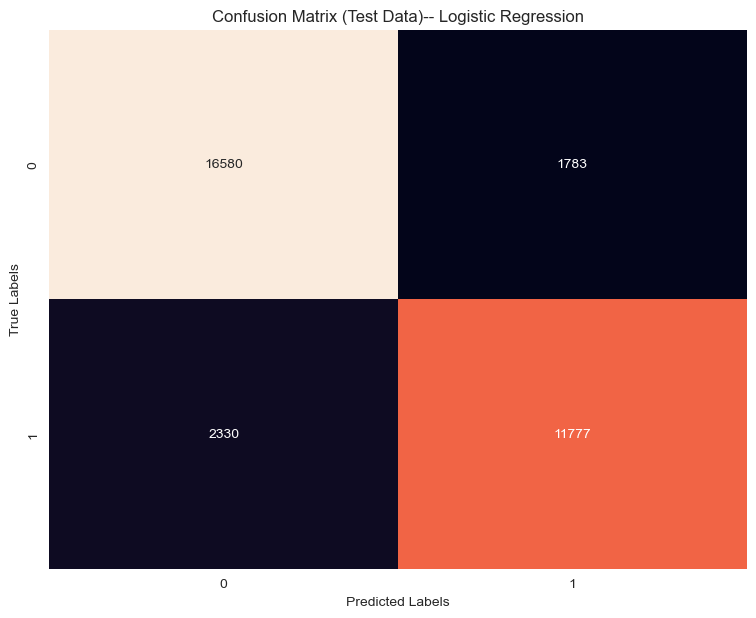

In [65]:
conf_matrix(model=logistic_reg,
            title="Confusion Matrix (test data)-- logistic Regression".title())

##### In this logistic regression model, before solving imbalance and after solving imbalanace produces almost the same f1-score, but the score of the model without solving imbalance is slightly higher than the rest.

## XG Boost

In [72]:
XGB_clf = XGBClassifier(
    objective='binary:logistic', 
    n_estimators=150, 
    max_depth=5, 
    colsample_bytree=0.8, 
    subsample=0.9, 
    reg_lambda=100, 
    learning_rate=0.2 
)

XGB_clf.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
model_performance(model_name="XGBClassifier",
                  model=XGB_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model name: XGBClassifier
F1-score for training data using XGBClassifier : 95.5 %
F1-score for testing data using XGBClassifier : 95.3 %
Accuracy Score for training data using XGBClassifier : 96.1 %
Accuracy Score for testing data using XGBClassifier : 96.0 %


In [74]:
cross_validation(model_name="Cross Validation Using XGBClassifier",
                 model=XGB_clf,
                 X_valid=X_train_final,
                 y_valid=y_train)

==> Model name: Cross Validation Using XGBClassifier
Train score : 0.96 
standard deviation For Train Score : 0.0
Test score : 0.96 
standard deviation For Test Score : 0.001


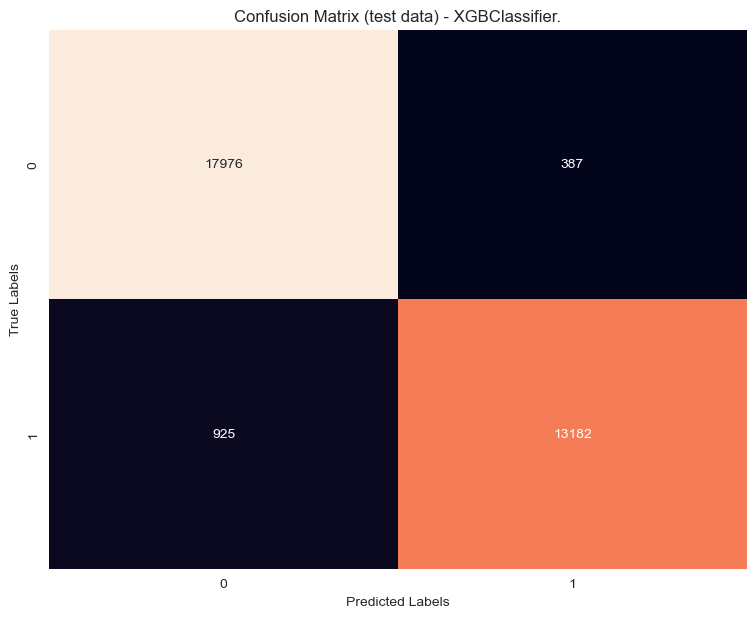

In [75]:
conf_matrix(model=XGB_clf,
           title="Confusion Matrix (test data) - XGBClassifier.")

In [76]:
XGB_clf_smote = XGBClassifier(
    objective='binary:logistic', 
    n_estimators=150, 
    max_depth=5, 
    colsample_bytree=0.8, 
    subsample=0.9, 
    reg_lambda=100, 
    learning_rate=0.2 
)

XGB_clf_smote.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
model_performance(model_name="XGBClassifier Using SMOTE.",
                  model=XGB_clf_smote,
                  X_train_data=X_train_resampled,
                  X_test_data=X_test_final,
                  y_train_data=y_train_resampled,
                  y_test_data=y_test)

==> Model name: XGBClassifier Using SMOTE.
F1-score for training data using XGBClassifier Using SMOTE. : 95.8 %
F1-score for testing data using XGBClassifier Using SMOTE. : 95.3 %
Accuracy Score for training data using XGBClassifier Using SMOTE. : 95.89999999999999 %
Accuracy Score for testing data using XGBClassifier Using SMOTE. : 96.0 %


I will be tuning the parameters of XGBClassifier using Random Search.

In [79]:
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  
    'max_depth': np.arange(3, 10, 1),  
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),  
    'subsample': np.arange(0.5, 1.0, 0.1),  
    'reg_lambda': [0, 1, 10, 100],  
    'learning_rate': [0.01, 0.1, 0.2, 0.3]  
}

In [85]:
xgb_clf = XGBClassifier(objective='binary:logistic')

In [88]:
xgb_random = RandomizedSearchCV(
    xgb_clf,  
    param_distributions=param_grid,  
    n_iter=25,  
    scoring=f1_scorer,  
    cv=5,  
    n_jobs=-1,  
    verbose=4, 
    random_state=42  
)

In [89]:
xgb_random.fit(X_train_final, y_train)

print(f"Best Hyperparameters: {xgb_random.best_params_}")
print(f"Best Accuracy: {xgb_random.best_score_}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Hyperparameters: {'subsample': 0.7999999999999999, 'reg_lambda': 10, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Best Accuracy: 0.9622318037162509


Next, XGBclassifier will be retrained after tuning.

In [90]:
XGB_tuned = xgb_random.best_estimator_
XGB_tuned.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
model_performance(model_name="XGBClassifier Tuned",
                  model=XGB_tuned,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model name: XGBClassifier Tuned
F1-score for training data using XGBClassifier Tuned : 98.8 %
F1-score for testing data using XGBClassifier Tuned : 95.5 %
Accuracy Score for training data using XGBClassifier Tuned : 99.0 %
Accuracy Score for testing data using XGBClassifier Tuned : 96.2 %


In [92]:
cross_validation(model_name="Cross Validation Using XGBClassifier After Tuning.",
                 model=XGB_tuned,
                 X_valid=X_train_final,
                 y_valid=y_train)

==> Model name: Cross Validation Using XGBClassifier After Tuning.
Train score : 0.99 
standard deviation For Train Score : 0.0
Test score : 0.96 
standard deviation For Test Score : 0.001


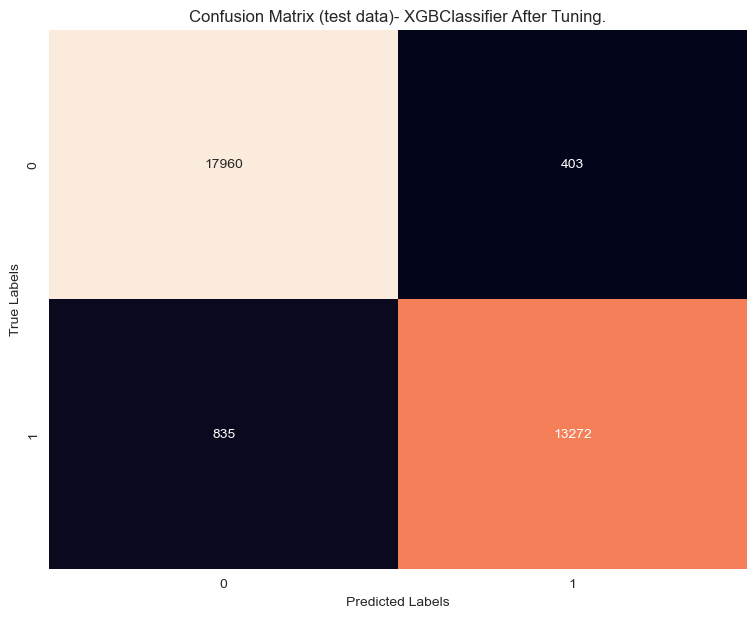

In [93]:
conf_matrix(model=XGB_tuned,
           title="Confusion Matrix (test data)- XGBClassifier After Tuning.")

In [100]:
y_test_predicted = XGB_tuned.predict(X_test_final)
print("Recall score for XGBOOST After Tuning :\n",recall_score(y_true=y_test, y_pred=y_test_predicted))
print("=="*30)
print("Precision Score for XGBOOST After Tuning :\n",precision_score(y_true=y_test, y_pred=y_test_predicted))
print("=="*30)
print("Classification report for XGBOOST After Tuning :\n",classification_report(y_true=y_test, y_pred=y_test_predicted))

Recall score for XGBOOST After Tuning :
 0.9408095271850854
Precision Score for XGBOOST After Tuning :
 0.9705301645338208
Classification report for XGBOOST After Tuning :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     18363
           1       0.97      0.94      0.96     14107

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [102]:
joblib.dump(XGB_tuned, "xgboost.pkl")

['xgboost.pkl']

## Support Vector Machine

In [66]:
## without solving imbalance in the data 
SVC_clf = SVC(C=2, kernel="poly", degree=3)

# Fit the SVM classifier to the training data
SVC_clf.fit(X_train_final, y_train)

SVC(C=2, kernel='poly')

In [67]:
model_performance(model_name="Support Vector Machine",
                  model=SVC_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model name: Support Vector Machine
F1-score for training data using Support Vector Machine : 92.9 %
F1-score for testing data using Support Vector Machine : 92.80000000000001 %
Accuracy Score for training data using Support Vector Machine : 94.0 %
Accuracy Score for testing data using Support Vector Machine : 93.89999999999999 %


In [68]:
## SVC with SMOTE to solve imbalancing
SVC_clf_smote = SVC(C=2, kernel="poly", degree=3)
SVC_clf_smote.fit(X_train_resampled, y_train_resampled)

SVC(C=2, kernel='poly')

In [69]:
model_performance(model_name="Support Vector Machine Using SMOTE.",
                  model=SVC_clf_smote,
                  X_train_data=X_train_resampled,
                  X_test_data=X_test_final,
                  y_train_data=y_train_resampled,
                  y_test_data=y_test)

==> Model name: Support Vector Machine Using SMOTE.
F1-score for training data using Support Vector Machine Using SMOTE. : 93.8 %
F1-score for testing data using Support Vector Machine Using SMOTE. : 92.9 %
Accuracy Score for training data using Support Vector Machine Using SMOTE. : 93.89999999999999 %
Accuracy Score for testing data using Support Vector Machine Using SMOTE. : 93.89999999999999 %


Again, the SVC model without solving imbalance has higher score.

## Because XGboost has the highest performance of 97% f1-score, I will be using it as our final model for the prediction.